### Imports


In [185]:
%load_ext autoreload
%autoreload 2
#%matplotlib widget

import sys  # update paths
import os  # import os in order to find relative path
import numpy as np 
import matplotlib.pyplot as plt


sys.path.append('../../scresonators')
sys.path.append('../../meas_analysis')
sys.path.append('../../')

base_pth = '../../../Images/Resonators/'

import seaborn as sns
import scipy.constants as cs
from scipy.optimize import curve_fit

colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)

import ana_resonator as ana_res

min_power = -110
atten = -50 
#import importlib 
#importlib.reload(scres)

pth_base = '../../../../JJ_fab/Coherence Sample /Resonators Measurement/240719/data/'

res_name = '240725'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sweep power/temp, plot results

### Run sweep 

Counter({6711793: 24, 7447060: 24, 6423087: 24, 7063648: 24, 6136373: 24, 5816871: 24, 7785143: 24, 6723184: 24})
0
Counter({6711793: 24, 7447060: 24, 6423087: 24, 7063648: 24, 6136373: 24, 5816871: 24, 7785143: 24, 6723184: 24})
['res_5816871_90dbm', 'res_5816871_80dbm', 'res_5816871_70dbm', 'res_5816871_60dbm', 'res_5816871_50dbm', 'res_5816871_40dbm', 'res_5816871_30dbm', 'res_5816871_20dbm']
Time elapsed:  2.3428409099578857
['res_6136373_90dbm', 'res_6136373_80dbm', 'res_6136373_70dbm', 'res_6136373_60dbm', 'res_6136373_50dbm', 'res_6136373_40dbm', 'res_6136373_30dbm', 'res_6136373_20dbm']
Time elapsed:  4.519497871398926
['res_6423087_90dbm', 'res_6423087_80dbm', 'res_6423087_70dbm', 'res_6423087_60dbm', 'res_6423087_50dbm', 'res_6423087_40dbm', 'res_6423087_30dbm', 'res_6423087_20dbm']


Time elapsed:  6.827438116073608
['res_6711793_90dbm', 'res_6711793_80dbm', 'res_6711793_70dbm', 'res_6711793_60dbm', 'res_6711793_50dbm', 'res_6711793_40dbm', 'res_6711793_30dbm', 'res_6711793_20dbm']


Time elapsed:  9.62966012954712
['res_6723184_90dbm', 'res_6723184_80dbm', 'res_6723184_70dbm', 'res_6723184_60dbm', 'res_6723184_50dbm', 'res_6723184_40dbm', 'res_6723184_30dbm', 'res_6723184_20dbm']
Time elapsed:  11.78517198562622
['res_7063648_90dbm', 'res_7063648_80dbm', 'res_7063648_70dbm', 'res_7063648_60dbm', 'res_7063648_50dbm', 'res_7063648_40dbm', 'res_7063648_30dbm', 'res_7063648_20dbm']
Time elapsed:  14.198611974716187
['res_7447060_90dbm', 'res_7447060_80dbm', 'res_7447060_70dbm', 'res_7447060_60dbm', 'res_7447060_50dbm', 'res_7447060_40dbm', 'res_7447060_30dbm', 'res_7447060_20dbm']
Time elapsed:  16.428251028060913
['res_7785143_90dbm', 'res_7785143_80dbm', 'res_7785143_70dbm', 'res_7785143_60dbm', 'res_7785143_50dbm', 'res_7785143_40dbm', 'res_7785143_30dbm', 'res_7785143_20dbm']
Time elapsed:  18.47053098678589


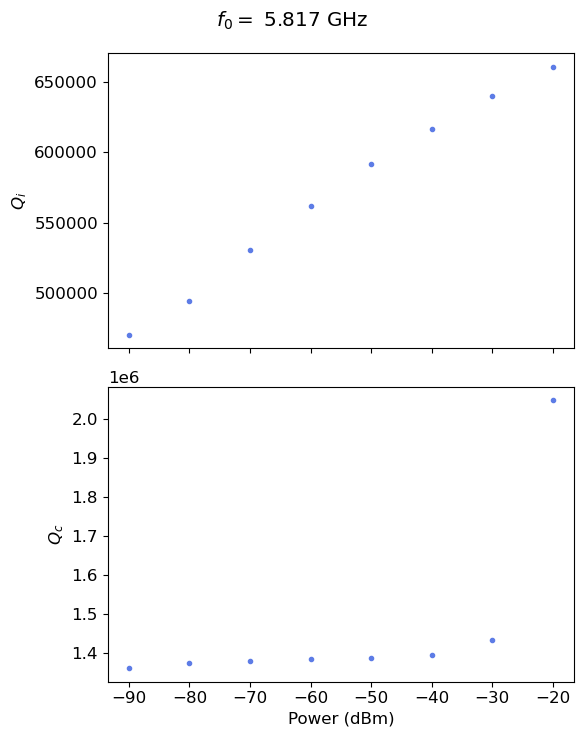

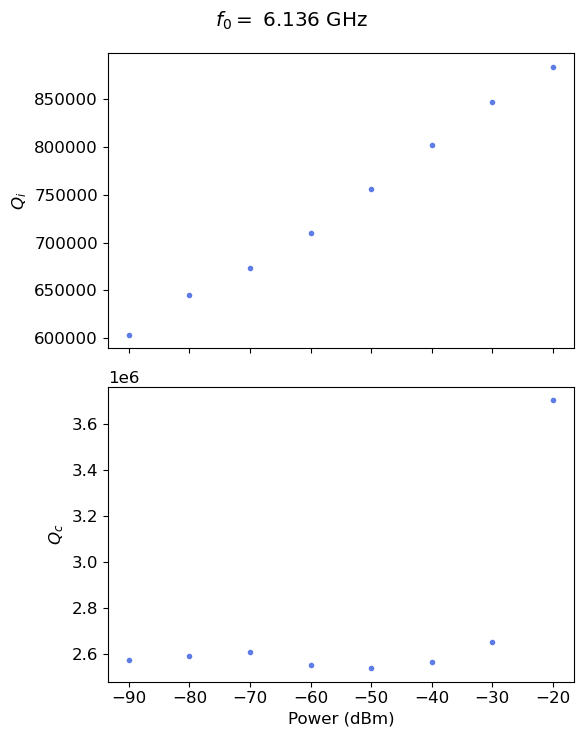

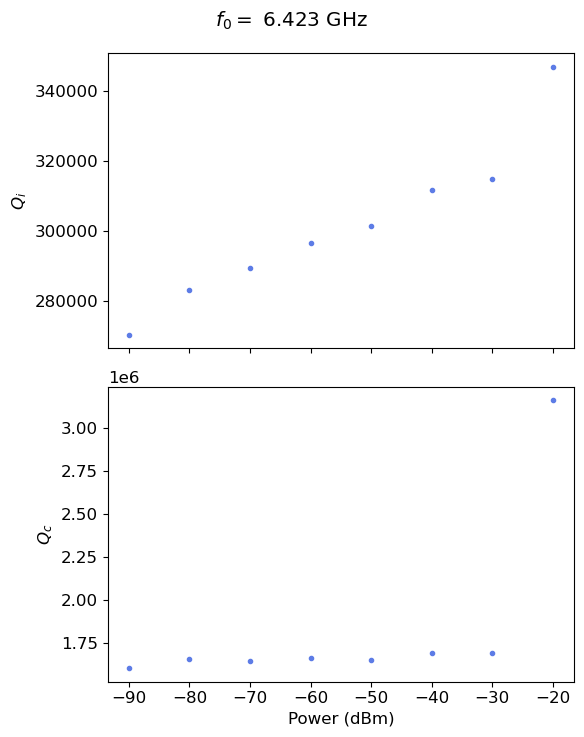

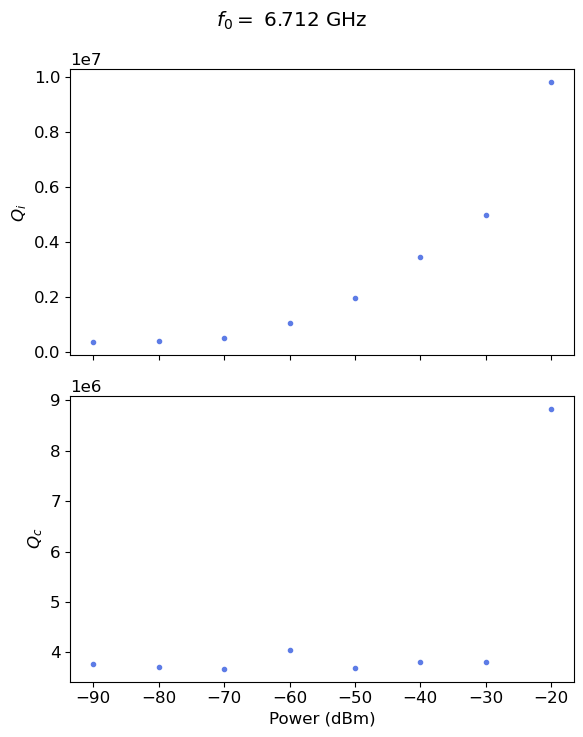

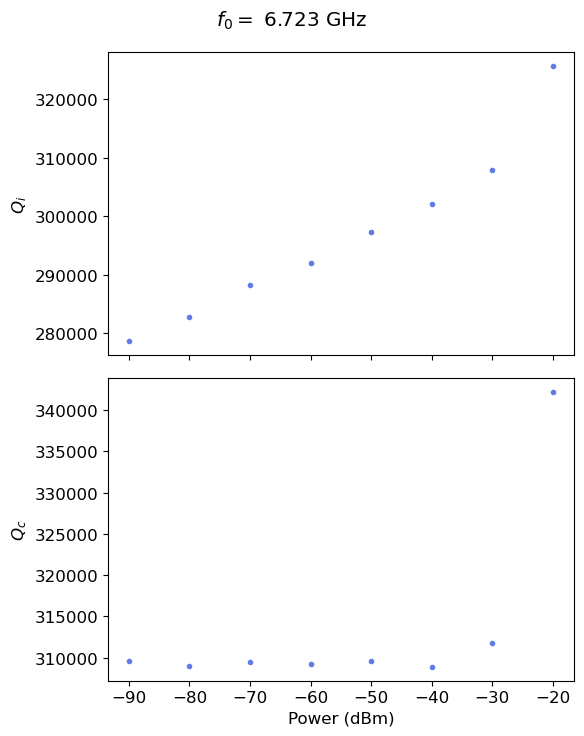

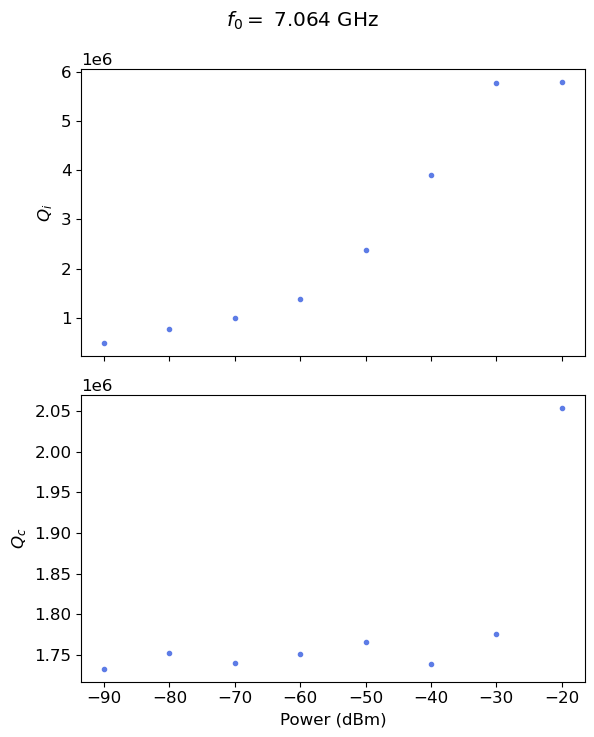

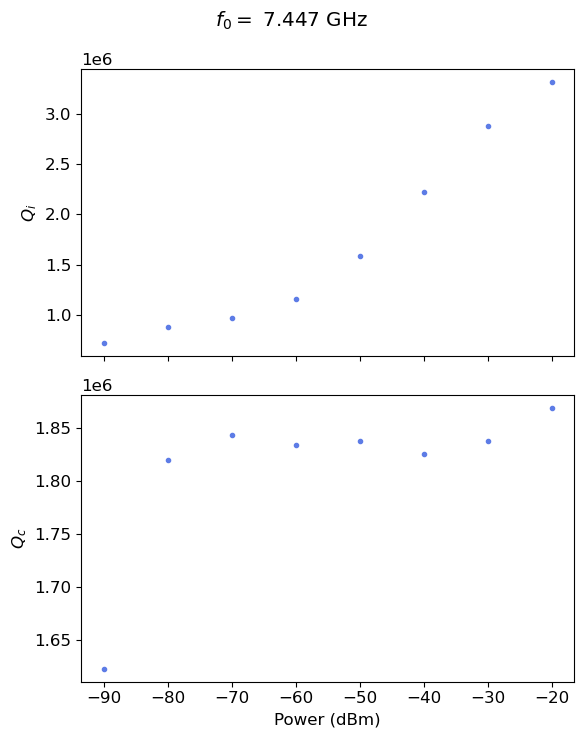

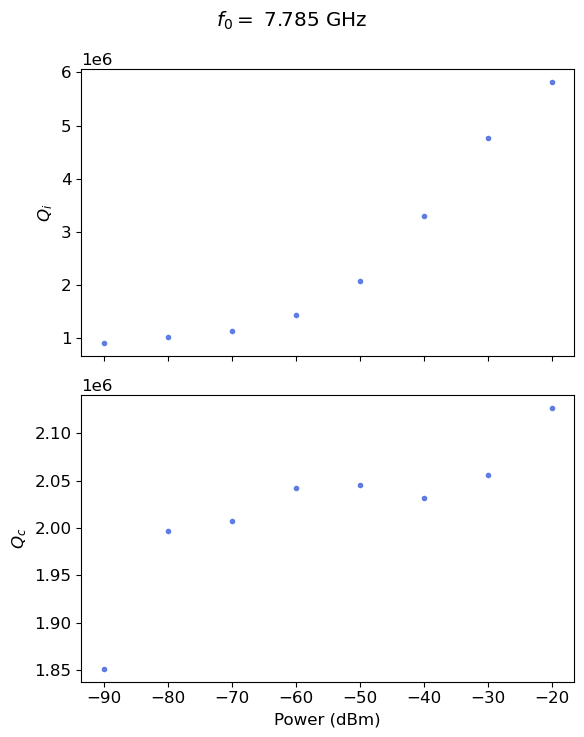

In [100]:
# Define directory manually  
pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240719/data/'
directories = ['sample1_power_sweep_2']
res_params = ana_res.analyze_sweep(directories, pth)

Counter({5825968: 20, 6142839: 20, 6429811: 20, 7462016: 19, 7793014: 19, 6734488: 19, 6729208: 19, 7083853: 19})
0
Counter({5825968: 20, 6142839: 20, 6429811: 20, 7462016: 19, 7793014: 19, 6734488: 19, 6729208: 19, 7083853: 19})
['res_5825968_115dbm_wide', 'res_5825968_110dbm_wide', 'res_5825968_105dbm_wide', 'res_5825968_100dbm_wide', 'res_5825968_95dbm_wide', 'res_5825968_90dbm_wide', 'res_5825968_85dbm_wide', 'res_5825968_80dbm_wide', 'res_5825968_75dbm_wide', 'res_5825968_70dbm_wide', 'res_5825968_65dbm_wide', 'res_5825968_60dbm_wide', 'res_5825968_55dbm_wide', 'res_5825968_50dbm_wide', 'res_5825968_45dbm_wide', 'res_5825968_40dbm_wide', 'res_5825968_35dbm_wide', 'res_5825968_30dbm_wide', 'res_5825968_25dbm_wide', 'res_5825968_20dbm_wide']
Time elapsed:  2.4767568111419678
['res_6142839_115dbm_wide', 'res_6142839_110dbm_wide', 'res_6142839_105dbm_wide', 'res_6142839_100dbm_wide', 'res_6142839_95dbm_wide', 'res_6142839_90dbm_wide', 'res_6142839_85dbm_wide', 'res_6142839_80dbm_wide'

Time elapsed:  11.616777896881104
['res_6734488_110dbm_wide', 'res_6734488_105dbm_wide', 'res_6734488_100dbm_wide', 'res_6734488_95dbm_wide', 'res_6734488_90dbm_wide', 'res_6734488_85dbm_wide', 'res_6734488_80dbm_wide', 'res_6734488_75dbm_wide', 'res_6734488_70dbm_wide', 'res_6734488_65dbm_wide', 'res_6734488_60dbm_wide', 'res_6734488_55dbm_wide', 'res_6734488_50dbm_wide', 'res_6734488_45dbm_wide', 'res_6734488_40dbm_wide', 'res_6734488_35dbm_wide', 'res_6734488_30dbm_wide', 'res_6734488_25dbm_wide', 'res_6734488_20dbm_wide']


Time elapsed:  14.175045728683472
['res_7083853_110dbm_wide', 'res_7083853_105dbm_wide', 'res_7083853_100dbm_wide', 'res_7083853_95dbm_wide', 'res_7083853_90dbm_wide', 'res_7083853_85dbm_wide', 'res_7083853_80dbm_wide', 'res_7083853_75dbm_wide', 'res_7083853_70dbm_wide', 'res_7083853_65dbm_wide', 'res_7083853_60dbm_wide', 'res_7083853_55dbm_wide', 'res_7083853_50dbm_wide', 'res_7083853_45dbm_wide', 'res_7083853_40dbm_wide', 'res_7083853_35dbm_wide', 'res_7083853_30dbm_wide', 'res_7083853_25dbm_wide', 'res_7083853_20dbm_wide']


Time elapsed:  16.423685789108276
['res_7462016_110dbm_wide', 'res_7462016_105dbm_wide', 'res_7462016_100dbm_wide', 'res_7462016_95dbm_wide', 'res_7462016_90dbm_wide', 'res_7462016_85dbm_wide', 'res_7462016_80dbm_wide', 'res_7462016_75dbm_wide', 'res_7462016_70dbm_wide', 'res_7462016_65dbm_wide', 'res_7462016_60dbm_wide', 'res_7462016_55dbm_wide', 'res_7462016_50dbm_wide', 'res_7462016_45dbm_wide', 'res_7462016_40dbm_wide', 'res_7462016_35dbm_wide', 'res_7462016_30dbm_wide', 'res_7462016_25dbm_wide', 'res_7462016_20dbm_wide']


Time elapsed:  18.9125816822052
['res_7793014_110dbm_wide', 'res_7793014_105dbm_wide', 'res_7793014_100dbm_wide', 'res_7793014_95dbm_wide', 'res_7793014_90dbm_wide', 'res_7793014_85dbm_wide', 'res_7793014_80dbm_wide', 'res_7793014_75dbm_wide', 'res_7793014_70dbm_wide', 'res_7793014_65dbm_wide', 'res_7793014_60dbm_wide', 'res_7793014_55dbm_wide', 'res_7793014_50dbm_wide', 'res_7793014_45dbm_wide', 'res_7793014_40dbm_wide', 'res_7793014_35dbm_wide', 'res_7793014_30dbm_wide', 'res_7793014_25dbm_wide', 'res_7793014_20dbm_wide']
Time elapsed:  21.23570489883423


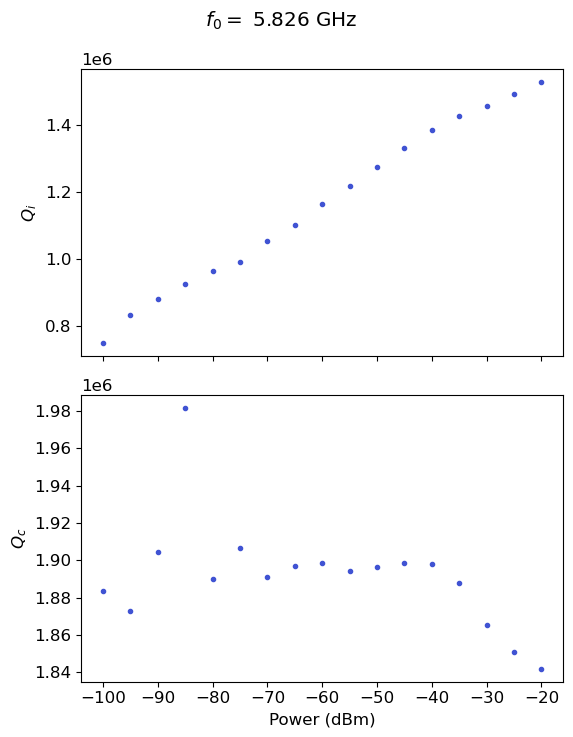

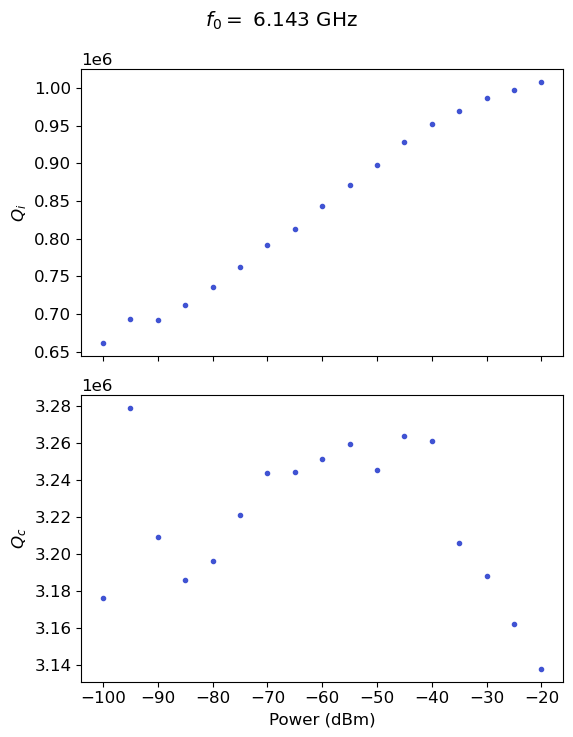

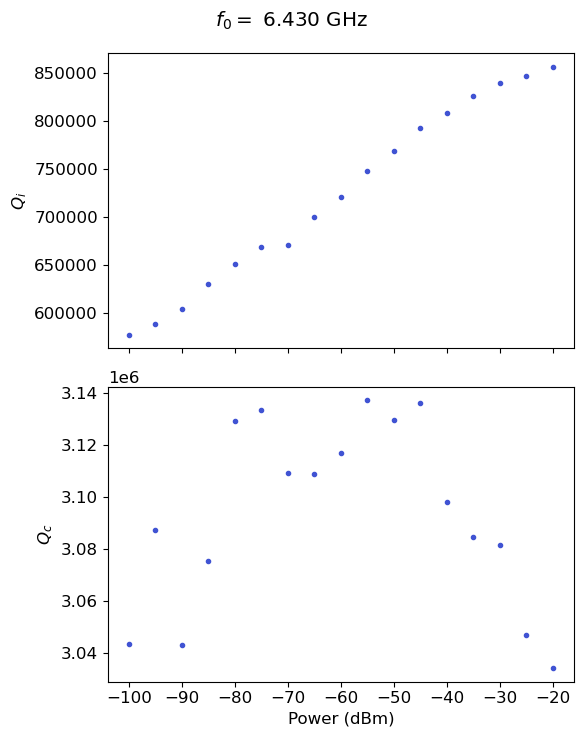

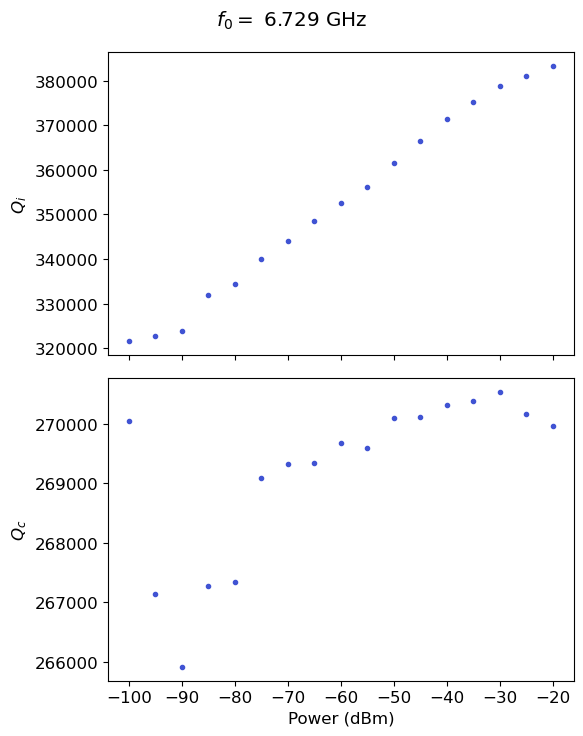

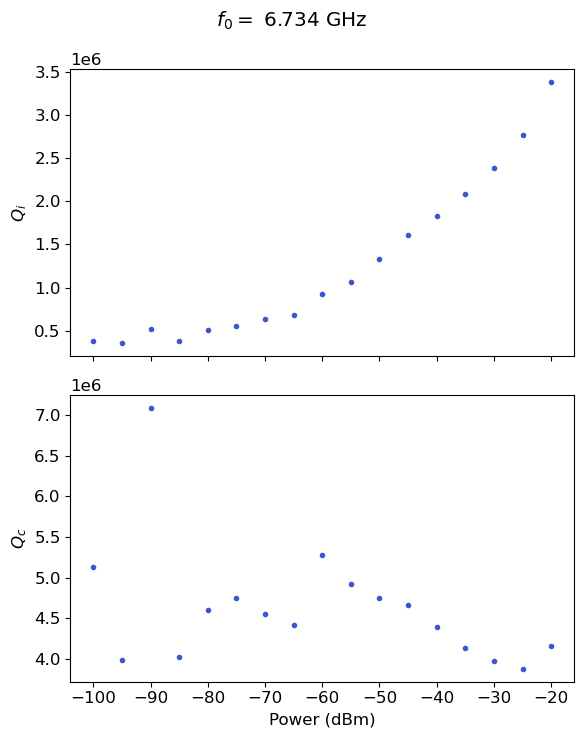

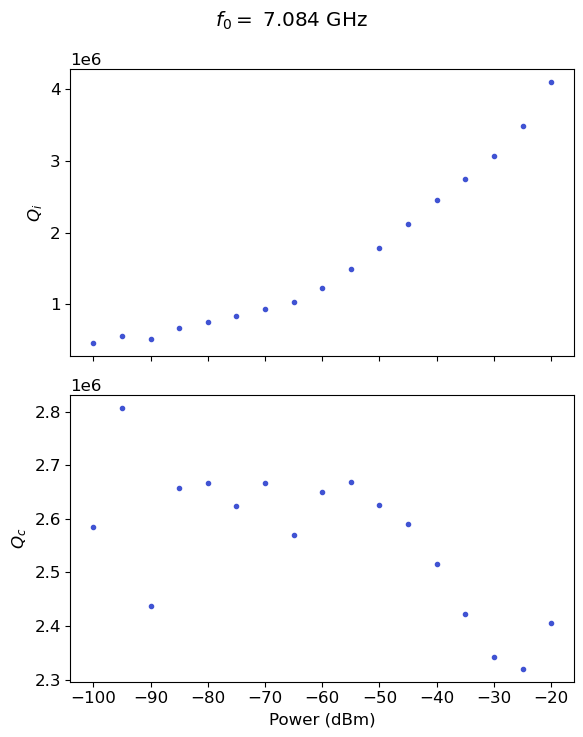

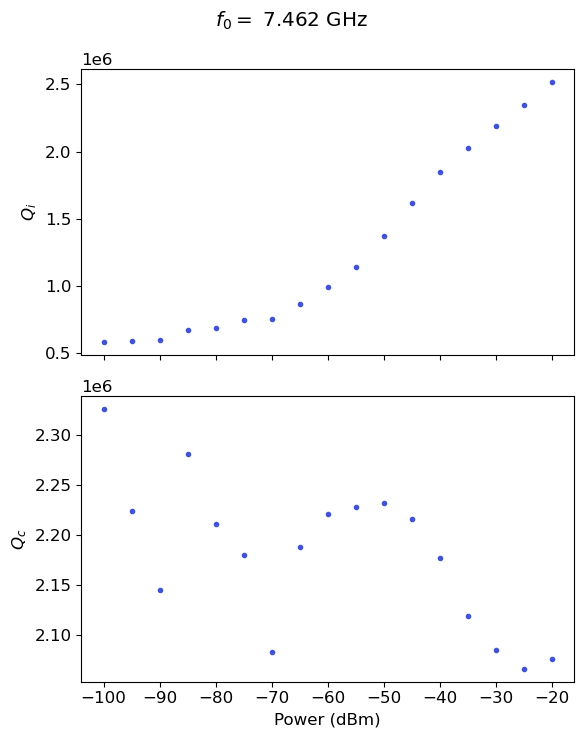

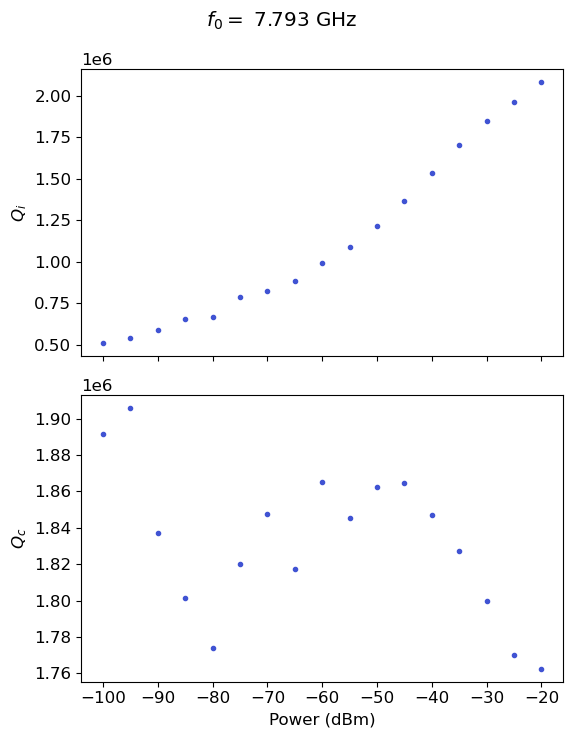

In [186]:
pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/'
directories = ['power_sweep7']
res_params = ana_res.analyze_sweep_double(directories, pth)

In [186]:
# Initialize the directories list for a temperature sweep 
folder_path = pth_base  # Replace with the actual folder path

directories = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
directories = sorted(directories)
dir_base = directories[2]

#directories = directories[3:-1]
print(directories)

res_data=[]

temps = np.array([float(d[7:]) for d in directories])
print(temps)
max_temp = 1500
inds = np.where(temps < max_temp)
temps = temps[inds]
directories = np.array(directories)[inds]
inds = np.argsort(temps)
temps = temps[inds]
directories = directories[inds]
print(directories)

res_params = analyze_sweep(directories)

['0720_test', '0722_test', 'sample1_power_sweep', 'sample1_power_sweep_2']


ValueError: could not convert string to float: 'st'

### Plot qualities vs temp and power for 1 resonator 

In [145]:
i=5
cbar=False # Use color bar instead of legend 
xval = 'temp' 
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1

inds = np.argsort(temps)
en = 1e-3*temps[inds]*cs.k/cs.h/res_params[i]['freqs'][inds,0]
if xval == 'temp': 
    x = temps[inds]
    xlab = 'Temperature (mK)'
else:     
    x=en
    xlab = '$k_B T / h f_0$'

min_freq = np.nanmin(res_params[i]['freqs'][inds,:])
sns.set_palette('coolwarm', n_colors=res_params[0]['pow'].shape[1])

# Temperature sweep 
fig, ax = plt.subplots(4,1, figsize=(6,9), sharex=True) 
for j in range(res_params[i]['pow'].shape[1]):
    ax[0].plot(x, res_params[i]['qi'][inds,j], '.-')
    #ax[1].plot(temps[inds], res_params[i]['qi'][inds,j]/res_params[i]['qi'][inds,j][0], '.-')
    ax[1].plot(x, res_params[i]['qi'][inds,j]/np.max(res_params[i]['qi'][inds,j]), '.-')
    ax[2].plot(x, res_params[i]['qc'][inds,j], '.-')
    ax[3].plot(x, (res_params[i]['freqs'][inds,j]-min_freq)/min_freq, '.-')

if cbar: 
    norm = plt.Normalize(np.min(temps), np.max(temps))
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    ax[1].figure.colorbar(sm, ax=ax[1])

    norm = plt.Normalize(np.min(res_params[i]['pow']), np.max(res_params[i]['pow']))
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    ax[0].figure.colorbar(sm, ax=ax[0])

ax[0].set_ylabel('$Q_i$')
ax[1].set_ylabel('$Q_i/Q_i(0)$')
ax[2].set_ylabel('$Q_c$')
ax[3].set_xlabel('Temperature (mK)')
ax[3].set_xlabel(xlab)
ax[3].set_ylabel('$\Delta f/f_0$')

fig.tight_layout()
sns.set_palette('coolwarm', n_colors=res_params[0]['pow'].shape[0]+1)

fig, ax = plt.subplots(2,1, figsize=(6,6), sharex=True) 
#sns.set_palette('coolwarm', n_colors=res_params[0]['pow'].shape[0]-2)

ax[0].plot(res_params0[i]['pow'][0], res_params0[i]['qi'][0], '.-', label='60') #str(temps[j])+ ' mK'
ax[1].plot(res_params0[i]['pow'][0], res_params0[i]['qi'][0]/np.max(res_params0[i]['qi'][0]), '.-', label='60') #str(temps[j])+ ' mK'

# Plot power dependence 
for j in inds:
    ax[0].plot(res_params[i]['pow'][j,:], res_params[i]['qi'][j,:], '.-', label=int(temps[j])) #str(temps[j])+ ' mK'    
    ax[1].plot(res_params[i]['pow'][j,:], res_params[i]['qi'][j,:]/np.max(res_params[i]['qi'][j,:]), '.-')
    #ax[1].plot(res_params[i]['pow'][0,:], res_params[i]['qi'][j,:]/res_params[i]['qi'][j,:][0], '.-')


ax[0].set_ylabel('$Q_i$')
ax[1].set_ylabel('$Q_i/Q_i(0)$')
ax[1].set_xlabel('Power (dBm)')

ax[0].legend(fontsize=8)
fig.tight_layout()

NameError: name 'temps' is not defined

### Plot temp sweep for all (min power)

In [39]:
xval = 'temp' 
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.linewidth'] = 1.5
inds = np.argsort(temps)
en = 1e-3*temps[inds]*cs.k/cs.h/res_params[i]['freqs'][inds,0]
if xval == 'temp': 
    x = temps[inds]
    xlab = 'Temperature (mK)'
else:     
    x=en
    xlab = '$k_B T / h f_0$'

j=0
# Temperature sweep 
fig, ax = plt.subplots(2,1, figsize=(6,6), sharex=True) 
for i in range(len(res_params)):
    inds2 = res_params[i]['qi'][inds,j]/np.max(res_params[i]['qi'][inds,j]) > 0.72
    min_freq = np.nanmin(res_params[i]['freqs'][inds,:])
    x = temps[inds2]

    ax[0].plot(x, res_params[i]['qi'][inds2,j]/np.max(res_params[i]['qi'][inds2,j]), '.-')
    ax[1].plot(x, (res_params[i]['freqs'][inds2,j]-min_freq)/min_freq, '.-')

ax[0].set_ylabel('$Q_i/Q_{i,max}$')
ax[1].set_xlabel(xlab)
ax[1].set_ylabel('$\Delta f/f_0$')
plt.savefig(base_pth +'_'+res_name+ '_temp_sweep.png', dpi=300)

NameError: name 'temps' is not defined

### Plot power sweep for all (min temp)

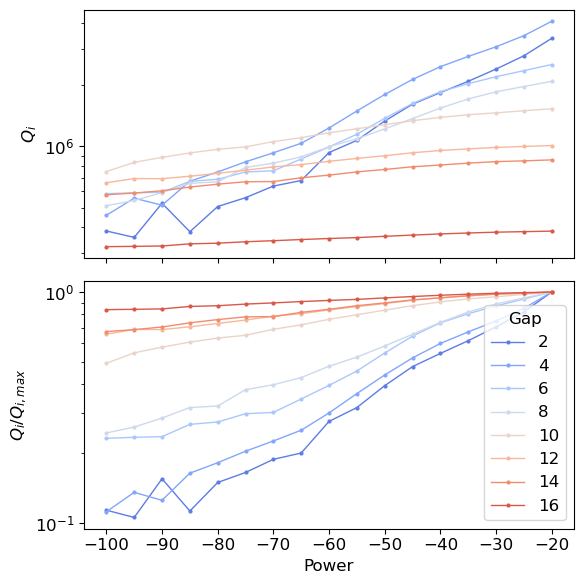

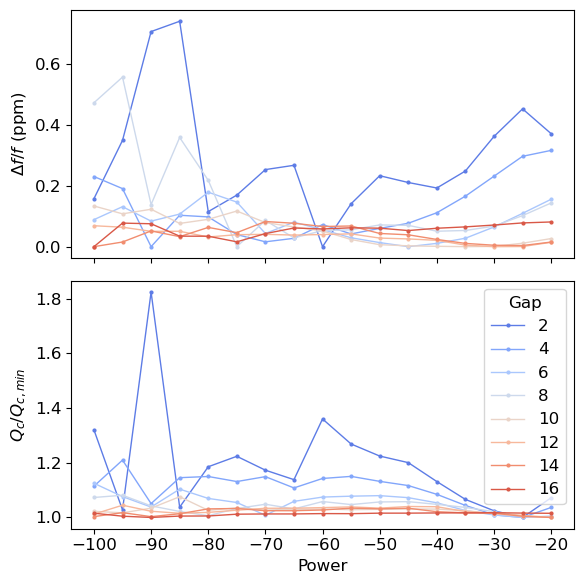

In [187]:
params={}

use_pitch = True
sample_2 = True
if sample_2: 
    min_power = -110
    max_power = -15
    pitch = [10, 12, 14, 16, 2, 4, 6, 8]
    target_freq =[5.9, 6.2, 6.5, 6.7, 7, 7.2, 7.5, 7.9]

else:
    min_power = -85
    max_power = -25
    pitch = [10, 12, 14, 2, 16, 4, 6, 8]
    target_freq =[5.9, 6.2, 6.5, 7, 6.7, 7.2, 7.5, 7.9]

pitch = pitch[0:len(res_params)]
if use_pitch: 
    ord = np.argsort(pitch) 
    res_params = [res_params[i] for i in ord]
    pitch = [pitch[i] for i in ord]
    target_freq = [target_freq[i] for i in ord]
   
params['pitch'] = pitch
params['target_freq'] = target_freq

sns.set_palette('coolwarm', len(res_params))
plt.rcParams['lines.markersize'] = 4
fig, ax = plt.subplots(2,1, figsize=(6,6), sharex=True) 
fig2, ax2 = plt.subplots(2,1, figsize=(6,6), sharex=True) 
for i in range(len(res_params)):    
    if use_pitch: 
        l = pitch[i]
    else: 
        l = round(np.min(res_params[i]['freqs']/1e9),4)
    inds = np.where((res_params[i]['pow'][0] >= min_power) & (res_params[i]['pow'][0] <= max_power))
    ax[0].semilogy(res_params[i]['pow'][0][inds], res_params[i]['qi'][0][inds], '.-', label=l) 
    ax[1].semilogy(res_params[i]['pow'][0][inds], res_params[i]['qi'][0][inds]/np.nanmax(res_params[i]['qi'][0]), '.-', label=l) 
    ax2[0].plot(res_params[i]['pow'][0][inds], 1e6*(res_params[i]['freqs'][0][inds]/np.nanmin(res_params[i]['freqs'][0][inds])-1), '.-', label=l) 
    ax2[1].plot(res_params[i]['pow'][0][inds], res_params[i]['qc'][0][inds]/np.nanmin(res_params[i]['qc'][0][inds]), '.-', label=l) 

ax[1].set_xlabel('Power')
ax[0].set_ylabel('$Q_i$')
ax[1].set_ylabel('$Q_i/Q_{i,max}$')
ax[1].legend(title='Gap')

ax2[1].set_xlabel('Power')
ax2[0].set_ylabel('$\Delta f/f$ (ppm)')
ax2[1].set_ylabel('$Q_c/Q_{c,min}$')
ax2[1].legend(title='Gap')
fig2.tight_layout()
fig2.savefig(base_pth +res_name+  '_Qcfreq_pow.png', dpi=300)

fig.tight_layout()
fig.savefig(base_pth +res_name+  '_Qi_pow.png', dpi=300)

In [188]:
res_params

[{'freqs': array([[6.7345e+09, 6.7345e+09, 6.7345e+09, 6.7345e+09, 6.7345e+09,
          6.7345e+09, 6.7345e+09, 6.7345e+09, 6.7345e+09, 6.7345e+09,
          6.7345e+09, 6.7345e+09, 6.7345e+09, 6.7345e+09, 6.7345e+09,
          6.7345e+09, 6.7345e+09]]),
  'phs': array([[ 0.116 , -0.0352, -0.1825,  0.0647, -0.0083,  0.0068,  0.1153,
           0.0141, -0.1208, -0.0646, -0.003 ,  0.041 ,  0.042 ,  0.0253,
          -0.0093, -0.0157,  0.0353]]),
  'q': array([[ 357307.2747,  327663.6688,  489299.7301,  347799.2986,
           455845.8335,  500139.3287,  559554.8253,  588333.0253,
           791931.2699,  877975.8865, 1038338.3523, 1195200.9487,
          1293238.7958, 1384605.175 , 1492404.3717, 1618553.5702,
          1865590.5074]]),
  'qi': array([[ 383879.7485,  356954.9931,  524954.0737,  380580.5678,
           505944.5309,  558970.4178,  637330.6405,  678653.7518,
           930406.8404, 1067902.1297, 1328380.8038, 1606795.7786,
          1832092.8008, 2080118.3912, 2388256.2077,

### Plot Qc and frequency 

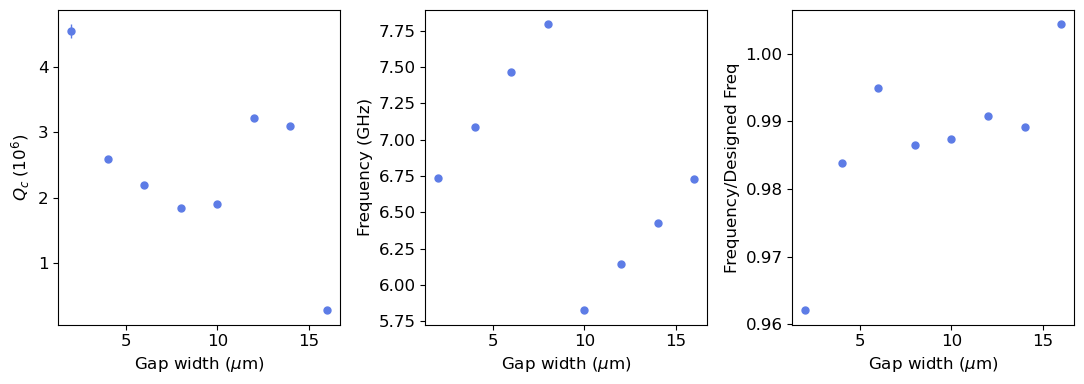

In [148]:
freqs = np.array([np.nanmean(res_params[i]['freqs'])/1e9 for i in range(len(res_params))])
qc = np.array([np.nanmedian(res_params[i]['qc']) for i in range(len(res_params))])
qc_err = np.array([np.nanmedian(res_params[i]['qc_err']) for i in range(len(res_params))])
params['qc'] = qc
params['qc_err'] = qc_err
params['freqs'] = freqs

fig, ax = plt.subplots(1,3, figsize=(11,4))
if use_pitch: 
    ax[0].errorbar(pitch, qc/1e6, yerr=qc_err/1e6, fmt='.', markersize=10)
    ax[1].plot(pitch, freqs, '.', markersize=10)
    ax[2].plot(pitch, freqs/target_freq, '.', markersize=10)
    for a in ax:         
        a.set_xlabel('Gap width ($\mu$m)')    
else:
    ax[i].set_xlabel('Frequency (GHz)')
    ax[0].plot(freqs, qc/1e6, '.', markersize=10)

ax[0].set_ylabel('$Q_c \; (10^6)$')
ax[1].set_ylabel('Frequency (GHz)')
ax[2].set_ylabel('Frequency/Designed Freq')
fig.tight_layout()

fig.savefig(base_pth +res_name+  '_params.png', dpi=300)

## Power and TLS fits

### Fit qother and qtls

Failed!


ValueError: 'x' and 'y' must have the same size

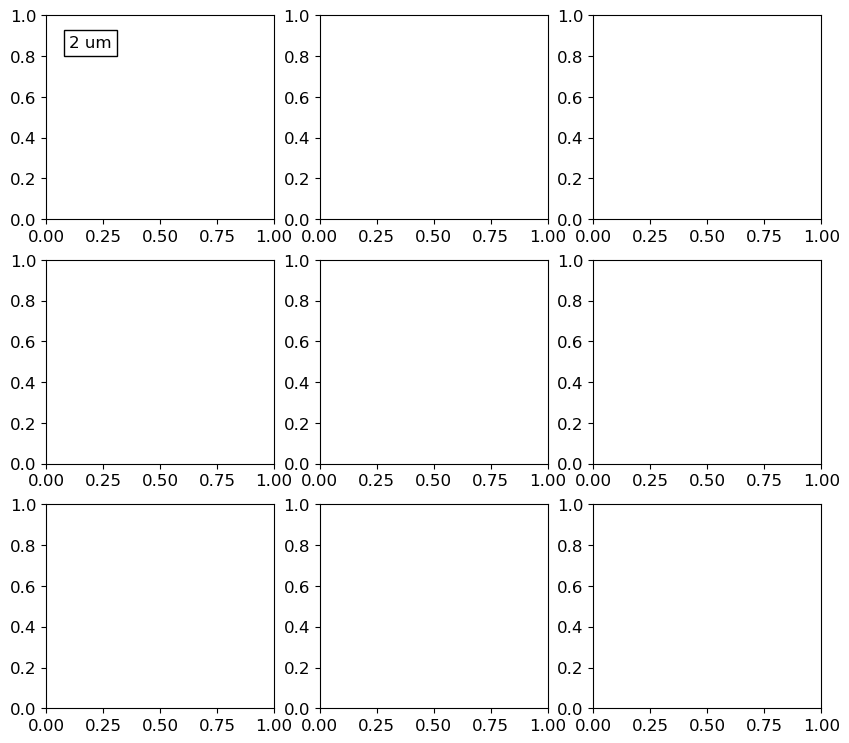

In [179]:
atten = -55
import ana_tls
j=0 # Temperature 
temp = 0.04
max_pow = -20
min_pow = -85
params_list = []
plt.rcParams['lines.markersize'] = 6

fig, ax = plt.subplots(3,3,figsize=(10,9))
ax = ax.flatten()
err_list = []
for i in range(len(res_params)):
    
    # photon numbers 
    nn = ana_tls.n(res_params[i]['pow'][j,:], res_params[i]['freqs'][j,:], res_params[i]['q'][j,:], res_params[i]['qc'][j,:], atten)
    freq = res_params[i]['freqs'][j,0]

    # Assume we know the temp and freq 
    q_fit_tls = lambda n, Qtls0, nc, beta: ana_tls.Qtls(n, temp, freq, Qtls0, nc, beta)
    q_fitn = lambda n, Qtls0, Qoth, nc, beta: ana_tls.Qtotn(n, temp, freq, Qtls0, Qoth, nc, beta)
    if i>=4:
        min_pow = -100
    nn_fit = nn[(res_params[i]['pow'][j,:] <= max_pow) & (res_params[i]['pow'][j,:] >= min_pow)] 
    qi_fit = res_params[i]['qi'][j,:][(res_params[i]['pow'][j,:] < max_pow) & (res_params[i]['pow'][j,:] > min_pow)] 
    qi_err = res_params[i]['qi_err'][j,:][(res_params[i]['pow'][j,:] < max_pow) & (res_params[i]['pow'][j,:] > min_pow)] 
    #print(nn_fit)
    p=[np.min(qi_fit), np.max(qi_fit), 3, 0.4]
    
    try: 
        p, err = curve_fit(q_fitn, nn_fit, qi_fit, p0=p, sigma=qi_err)
        err = np.sqrt(np.diag(err))       
        ax[i].semilogx(nn_fit, q_fitn(nn_fit, *p)/1e6, '-', linewidth=1)
    except: 
        err = np.nan*np.ones(4)

        p = np.nan*np.ones(4)
        print('Failed!')
    ax[i].text(0.1, 0.9, str(pitch[i])+' um', transform=ax[i].transAxes, fontsize=12, va='top', ha='left', bbox=dict(facecolor='white', edgecolor='black'))
    err_list.append(err)

    #ax[i].semilogx(nn_fit, qi_fit/1e6, '.', markersize=6, color=colors[1], label=pitch[i])
    ax[i].errorbar(nn_fit, qi_fit/1e6, yerr=qi_err/1e6, fmt='.', color=colors[1], label=pitch[i])
    ax[i].set_xscale('log')
    params_list.append(p)
for a in ax:
    a.set_xlabel(r'$\langle n \rangle$')
    #a.set_ylabel(r'$Q_i \: (10^6)$')
fig.tight_layout()
plt.savefig(base_pth +'_'+res_name+ '_qi.png', dpi=300)

plt.rcParams['lines.markersize'] = 10
params_list
qtls0 = np.array([params_list[i][0] for i in range(len(params_list))])
qother = np.array([params_list[i][1] for i in range(len(params_list))])
beta = np.array([params_list[i][3] for i in range(len(params_list))])

if use_pitch: 
    xval = pitch
else: 
    xval = freqs

qother[qother>1e8]=np.nan
qtls_err = np.array([err_list[i][0] for i in range(len(err_list))])
qother_err = np.array([err_list[i][1] for i in range(len(err_list))])
beta_err = np.array([err_list[i][3] for i in range(len(err_list))])

fig, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].errorbar(pitch, qtls0/1e6,yerr=qtls_err/1e6, fmt='.')
ax[1].errorbar(pitch, qother/1e6,yerr=qother_err/1e6, fmt='.')
ax[2].errorbar(pitch, beta, yerr=beta_err, fmt='.')
if ax[1].get_ylim()[1]>50: 
    ax[1].set_ylim(0,np.nanmax(qother/1e6)*1.1)
ax[0].set_ylim(0,np.nanmax(qtls0/1e6)*1.1)
ax[0].set_ylabel(r'$Q_{\mathrm{TLS}} \; ( 10^6) $')
ax[1].set_ylabel(r'$Q_{\mathrm{other}}  \; (10^6) $')
ax[2].set_ylabel('$\\beta$') 
for a in ax: 
    a.set_xlabel('Gap ($\mu$m)')
fig.tight_layout()

plt.savefig(base_pth +'_'+res_name+ '_fits.png', dpi=300)

params['qtls0'] = qtls0
params['qother'] = qother
params['beta'] = beta

params['qtls0_err'] = qtls_err  
params['qother_err'] = qother_err
params['beta_err'] = beta_err

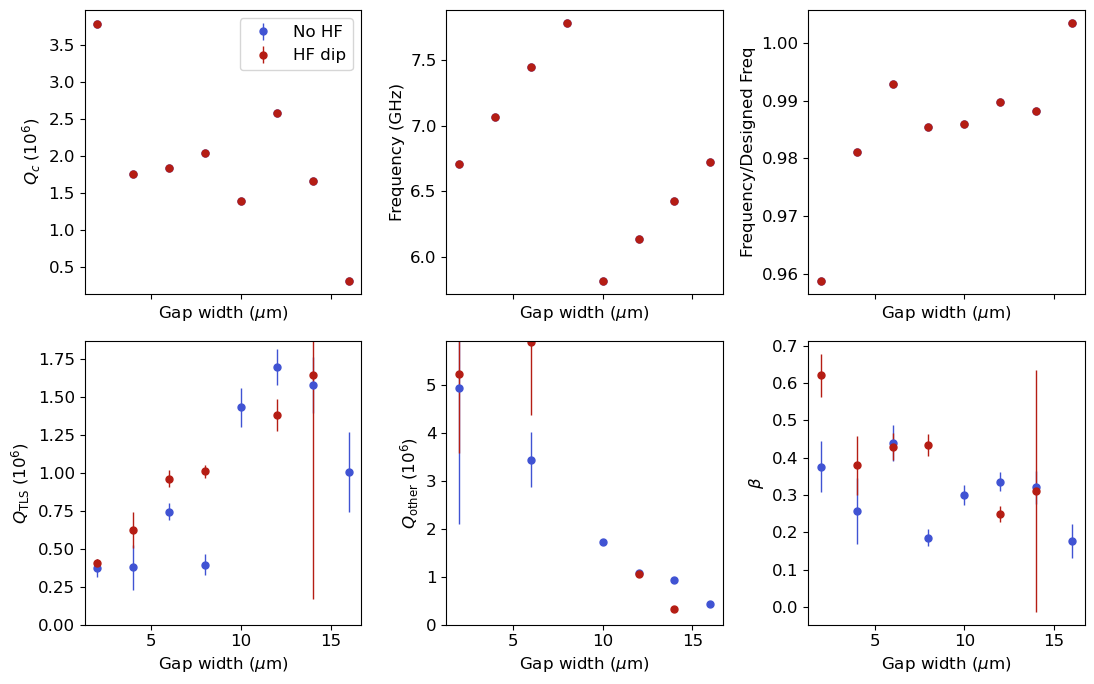

In [165]:
fig, ax = plt.subplots(2,3, figsize=(11,7), sharex=True)
ax = ax.flatten()
colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)

params = copy.deepcopy(params_copy3)
if use_pitch: 
    ax[0].errorbar(params['pitch'], params['qc']/1e6, yerr=params['qc_err']/1e6, fmt='.', markersize=10, label='No HF')
    ax[1].plot(params['pitch'], params['freqs'], '.', markersize=10)
    ax[2].plot(params['pitch'], params['freqs']/params['target_freq'], '.', markersize=10)   
else:
    ax[0].plot(params['freqs'], params['qc']/1e6, '.', markersize=10)

ax[3].errorbar(params['pitch'], params['qtls0']/1e6,yerr=params['qtls0_err']/1e6, fmt='.')
ax[4].errorbar(params['pitch'], params['qother']/1e6,yerr=params['qother_err']/1e6, fmt='.')
ax[5].errorbar(params['pitch'], params['beta'], yerr=params['beta_err'], fmt='.')
if ax[4].get_ylim()[1]>50: 
    ax[4].set_ylim(0,np.nanmax(params['qother']/1e6)*1.1)
ax[3].set_ylim(0,np.nanmax(params['qtls0']/1e6)*1.1)

params = copy.deepcopy(params_copy)

if use_pitch: 
    ax[0].errorbar(params['pitch'], params['qc']/1e6, yerr=params['qc_err']/1e6, fmt='.', markersize=10, label='HF dip')
    ax[1].plot(params['pitch'], params['freqs'], '.', markersize=10)
    ax[2].plot(params['pitch'], params['freqs']/params['target_freq'], '.', markersize=10)   
else:
    ax[0].plot(params['freqs'], params['qc']/1e6, '.', markersize=10)

ax[3].errorbar(params['pitch'], params['qtls0']/1e6,yerr=params['qtls0_err']/1e6, fmt='.')
ax[4].errorbar(params['pitch'], params['qother']/1e6,yerr=params['qother_err']/1e6, fmt='.')
ax[5].errorbar(params['pitch'], params['beta'], yerr=params['beta_err'], fmt='.')
if ax[4].get_ylim()[1]>50: 
    ax[4].set_ylim(0,np.nanmax(params['qother']/1e6)*1.1)
ax[3].set_ylim(0,np.nanmax(params['qtls0']/1e6)*1.1)

ax[0].legend()
ax[0].set_ylabel('$Q_c \; (10^6)$')
ax[1].set_ylabel('Frequency (GHz)')
ax[2].set_ylabel('Frequency/Designed Freq')
if ax[4].get_ylim()[1]>13: 
    ax[4].set_ylim(0,np.nanmax(qother/1e6)*1.2)
ax[3].set_ylim(0,np.nanmax(qtls0/1e6)*1.1)
ax[3].set_ylabel(r'$Q_{\mathrm{TLS}} \; ( 10^6) $')
ax[4].set_ylabel(r'$Q_{\mathrm{other}}  \; (10^6) $')
ax[5].set_ylabel('$\\beta$') 
for a in ax:         
    a.set_xlabel('Gap width ($\mu$m)')    
fig.tight_layout()

In [109]:
import copy

params_copy = copy.deepcopy(params)

In [164]:
params_copy3 = copy.deepcopy(params)

In [117]:
params = copy.deepcopy(params_copy)

In [122]:
params = copy.deepcopy(params_copy2)

In [140]:
params_copy

{'pitch': [2, 4, 6, 8, 10, 12, 14, 16],
 'target_freq': [7, 7.2, 7.5, 7.9, 5.9, 6.2, 6.5, 6.7],
 'qc': array([3781730.8791, 1751951.7354, 1835236.633 , 2036972.5411,
        1386338.9394, 2580689.777 , 1661145.8238,  309494.5966]),
 'qc_err': array([17431.8748,  6745.4169,  4832.3815, 11858.2582,  1143.3617,
         3287.9546,  1497.4678,   174.1529]),
 'freqs': array([6.7118, 7.0636, 7.4471, 7.7851, 5.8169, 6.1364, 6.4231, 6.7232]),
 'qtls0': array([ 407640.4111,  622912.3917,  961106.4793, 1010008.1218,
                 nan, 1382297.0949, 1643573.3807,          nan]),
 'qother': array([ 5227619.4574,           nan,  5883987.2327, 15754155.1556,
                  nan,  1048399.757 ,   331279.7297,           nan]),
 'beta': array([0.6211, 0.3791, 0.4297, 0.4333,    nan, 0.2482, 0.3106,    nan]),
 'qtls0_err': array([  23737.1753,  119751.1588,   55976.9918,   43677.9524,
                 nan,  104931.1982, 1472010.4057,          nan]),
 'qother_err': array([1.6588e+06, 2.2854e+20, 1.5

In [128]:
params_copy2

{'pitch': [2, 4, 6, 8, 10, 12, 14, 16],
 'target_freq': [7, 7.2, 7.5, 7.9, 5.9, 6.2, 6.5, 6.7],
 'qc': array([4554816.2482, 2590950.2629, 2188356.1861, 1837302.0027,
        1894066.3609, 3221199.028 , 3097864.1713,  269674.143 ]),
 'qc_err': array([102799.5925,  28466.4125,  15218.8269,  11606.2666,   4822.5852,
          9690.9018,  13898.0396,    299.6216]),
 'freqs': array([6.7345, 7.0839, 7.462 , 7.793 , 5.826 , 6.1428, 6.4298, 6.7292]),
 'qtls0': array([ 556139.7864,  749039.0076,  907509.5706,  632783.3849,
        1789678.3113, 2160667.5461, 2204688.0291, 1850105.3858]),
 'qother': array([3007581.3878, 5474498.1216, 2739288.6928, 4635722.0586,
        1645030.957 , 1050747.1256,  882466.5442,  396104.0816]),
 'beta': array([0.5151, 0.4172, 0.5652, 0.2716, 0.363 , 0.4074, 0.4509, 0.3312]),
 'qtls0_err': array([ 54043.6542,  50627.4481,  47997.7583, 174732.8435, 151570.3036,
        170034.4049, 129360.4396, 219657.6933]),
 'qother_err': array([ 525508.2643, 1022867.4879,  184459

## Single resonators

In [ ]:
pattern0 = r'res_(\d+)_\d{2,3}dbm'
resonators, file_list0 = ana_res.get_resonators(directories[0],pth, pattern0)

pattern = 'res_{:d}_'.format(resonators[j]) + '(\d{2,3})dbm'
file_list = ana_res.get_resonator_power_list(pattern, file_list0)

In [ ]:

for i in range(len(file_list)):
    pth = pth_base       
    try:
        data = ana_res.grab_data(pth, file_list[i])       
        output = ana_res.fit_resonator(data, file_list[i], output_path, 'png')    
    except: 
        print('fit failed')  


In [ ]:

pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/power_sweep5'
fname = 'res_7083855_60dbm_wide'
data = ana_res.grab_data(pth, fname)
output = ana_res.fit_resonator(data, fname, output_path, 'png')   
ana_res.plot_raw_data(data)